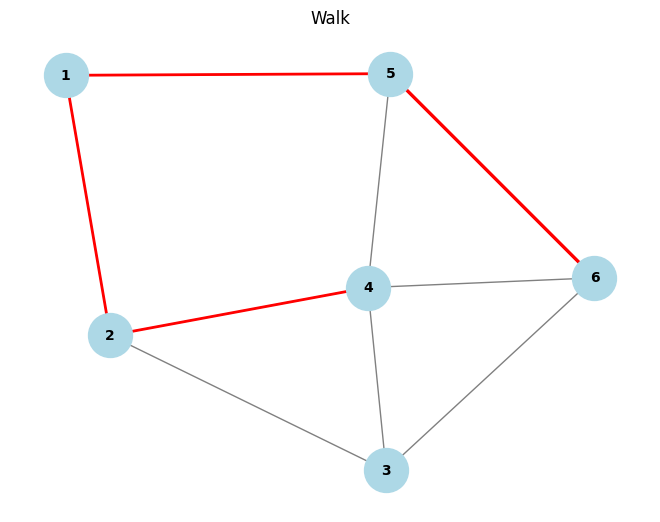

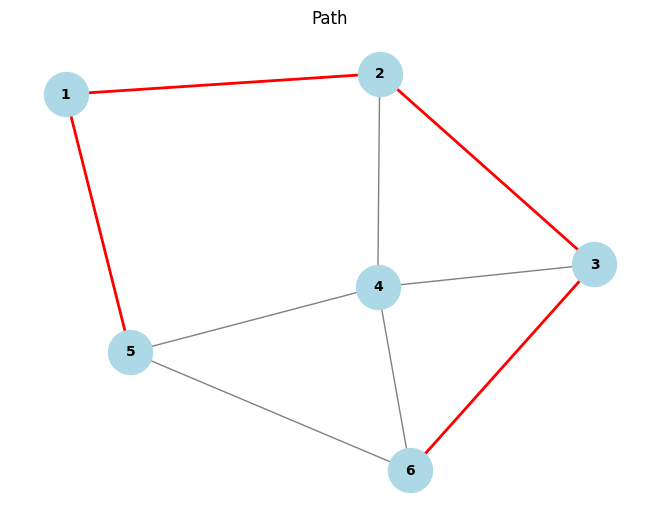

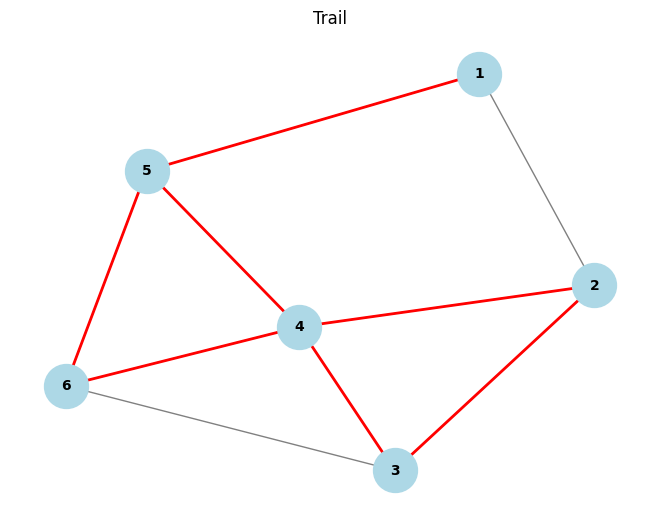

In [10]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# Criando o grafo
G = nx.Graph()

# Adicionando vértices
vertices = [1, 2, 3, 4, 5, 6]
G.add_nodes_from(vertices)

# Adicionando arestas
arestas = [(1, 2), (1, 5), (2, 3), (2, 4), (3, 4), (3, 6), (4, 5), (4, 6), (5, 6)]
G.add_edges_from(arestas)

# Função para gerar um passeio aleatório
def generate_walk(graph, length):
    start_vertex = random.choice(list(graph.nodes()))
    walk = [start_vertex]
    for _ in range(length - 1):
        neighbors = list(graph.neighbors(walk[-1]))
        if neighbors:
            next_vertex = random.choice(neighbors)
            walk.append(next_vertex)
        else:
            break
    return walk

# Função para gerar um caminho aleatório
def generate_path(graph, length):
    start_vertex = random.choice(list(graph.nodes()))
    path = [start_vertex]
    visited_vertices = set(path)
    for _ in range(length - 1):
        neighbors = list(graph.neighbors(path[-1]))
        unvisited_neighbors = [n for n in neighbors if n not in visited_vertices]
        if unvisited_neighbors:
            next_vertex = random.choice(unvisited_neighbors)
            path.append(next_vertex)
            visited_vertices.add(next_vertex)
        else:
            break
    return path

# Função para gerar uma trilha aleatória
def generate_trail(graph, length):
    edges = list(graph.edges())
    trail = []
    for _ in range(min(length, graph.number_of_edges())):
        edge = random.choice(edges)
        trail.append(edge)
        edges.remove(edge)
    return trail

# Função para plotar um grafo com um caminho específico
def plot_path(graph, path_or_trail, title):
    pos = nx.spring_layout(graph)
    nx.draw(graph, pos, with_labels=True, font_weight='bold', node_size=1000, node_color='lightblue', font_color='black', font_size=10, edge_color='gray')

    if len(path_or_trail) > 0 and isinstance(path_or_trail[0], tuple):  # Verifica se é uma trilha
        for edge in path_or_trail:
            nx.draw_networkx_edges(graph, pos, edgelist=[edge], edge_color='red', width=2)
    else:  # Caso contrário, é um caminho de vértices
        edges = [(path_or_trail[i], path_or_trail[i+1]) for i in range(len(path_or_trail)-1)]
        nx.draw_networkx_edges(graph, pos, edgelist=edges, edge_color='red', width=2)

    plt.title(title)
    plt.show()

# Gerando e plotando diferentes tipos de caminhos
random_walk = generate_walk(G, 8)
random_path = generate_path(G, 5)
random_trail = generate_trail(G, 7)

plot_path(G, random_walk, "Walk")
plot_path(G, random_path, "Path")
plot_path(G, random_trail, "Trail")